In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf

## MNIST

https://www.tensorflow.org/datasets/catalog/mnist

In [47]:
(ds_train, ds_test), ds_info = tfds.load('mnist', split=['train','test'], shuffle_files=True, as_supervised=True, with_info=True)

In [48]:
ds_train

<_OptionsDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>

In [17]:
ds_test

<_OptionsDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>

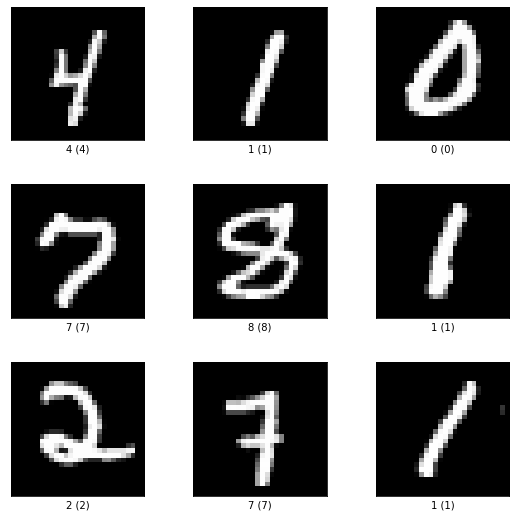

In [26]:
img = tfds.show_examples(ds_train, ds_info)

In [23]:
for image, label in ds_train.take(1):
    print(image.shape, label)

(28, 28, 1) tf.Tensor(4, shape=(), dtype=int64)


In [24]:
for image, label in ds_test.take(1):
    print(image.shape, label)

(28, 28, 1) tf.Tensor(2, shape=(), dtype=int64)


In [27]:
tfds.as_dataframe(ds_train.take(4), ds_info)

,image,label
0,,4
1,,1
2,,0
3,,7


In [15]:
ds_info

tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.1,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)

In [28]:
ds_info.features

FeaturesDict({
    'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})

In [30]:
ds_info.features['label'].num_classes

10

In [29]:
ds_info.features['label'].names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [32]:
ds_info.features.shape

{'image': (28, 28, 1), 'label': ()}

In [33]:
ds_info.features['image'].shape

(28, 28, 1)

In [34]:
ds_info.features.dtype

{'image': tf.uint8, 'label': tf.int64}

In [35]:
ds_info.splits['train'].num_examples

60000

In [49]:
# TFDS provide images of type tf.uint8
# while the model expects tf.float32
# so need to normalize images

def normalize_img(image, label):
    return tf.cast(image, tf.float32)/255.0, label

In [50]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
BATCH_SIZE = 128

In [51]:
ds_train = ds_train.map(normalize_img, num_parallel_calls=AUTOTUNE)     # map to normalize images
ds_train = ds_train.cache()                                             # cache dataset for memory fit
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)       # shuffle data, can be defaulted to 10000 or etc
ds_train = ds_train.batch(BATCH_SIZE)                                   # use it to get unique batches at each epoch

In [52]:
ds_test = ds_test.map(normalize_img, num_parallel_calls=AUTOTUNE)
ds_test = ds_test.batch(BATCH_SIZE)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(AUTOTUNE)

In [53]:
ds_train

<BatchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float32, tf.int64)>

In [54]:
ds_test

<PrefetchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float32, tf.int64)>

In [56]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10)
])

model.compile(
    optimizer = tf.keras.optimizers.Adam(0.001),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy'],
)

model.fit(
    ds_train,
    epochs = 5,
    validation_data=ds_test,
)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.3524 - accuracy: 0.9028 - val_loss: 0.1884 - val_accuracy: 0.9453
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1624 - accuracy: 0.9536 - val_loss: 0.1327 - val_accuracy: 0.9600
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1155 - accuracy: 0.9666 - val_loss: 0.1107 - val_accuracy: 0.9678
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0909 - accuracy: 0.9738 - val_loss: 0.0971 - val_accuracy: 0.9700
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0734 - accuracy: 0.9785 - val_loss: 0.0851 - val_accuracy: 0.9733


## IMDB

https://www.tensorflow.org/datasets/catalog/imdb_reviews

In [ ]:
(ds_train, ds_test), ds_info = tfds.load('imdb_reviews', split=['train','test'], shuffle_files=True, as_supervised=True, with_info=True)

In [58]:
ds_train

<_OptionsDataset shapes: ((), ()), types: (tf.string, tf.int64)>

In [59]:
ds_test

<_OptionsDataset shapes: ((), ()), types: (tf.string, tf.int64)>

In [64]:
ds_info

tfds.core.DatasetInfo(
    name='imdb_reviews',
    version=1.0.0,
    description='Large Movie Review Dataset.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.',
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(), dtype=tf.string),
    }),
    total_num_examples=100000,
    splits={
        'test': 25000,
        'train': 25000,
        'unsupervised': 50000,
    },
    supervised_keys=('text', 'label'),
    citation="""@InProceedings{maas-EtAl:2011:ACL-HLT2011,
      author    = {Maas, Andrew L.  and  Daly, Raymond E.  and  Pham, Peter T.  and  Huang, Dan  and  Ng, Andrew Y.  and  Potts, Christopher},
      title     = {Learning Word

In [65]:
ds_info.features

FeaturesDict({
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    'text': Text(shape=(), dtype=tf.string),
})

In [66]:
ds_info.features['label'].num_classes

2

In [67]:
ds_info.features['label'].names

['neg', 'pos']

In [70]:
ds_info.features.dtype

{'label': tf.int64, 'text': tf.string}

In [71]:
ds_info.splits['train'].num_examples

25000

In [77]:
for text, label in ds_train.take(5):
    print(text)
    print(label)

tf.Tensor(b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.", shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on t

In [78]:
for text, label in ds_train.take(5):
    print(text.numpy())
    print(label.numpy())

b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
0
b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development w

In [84]:
for text, label in ds_train.take(5):
    print(text.numpy().decode('utf8'))
    print(label.numpy())

This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.
0
I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was co

In [85]:
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

In [86]:
for text, label in ds_train:
    training_sentences.append(text.numpy().decode('utf8'))
    training_labels.append(label.numpy())

In [87]:
for text, label in ds_train:
    testing_sentences.append(text.numpy().decode('utf8'))
    testing_labels.append(label.numpy())

In [88]:
training_sentences[:2]

["This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
 'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development wa

In [89]:
training_labels[:2]

[0, 0]

In [91]:
import numpy as np

training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

In [92]:
VOCAB_SIZE = 10000                      # number of unique words in the corpus
EMBED_DIM = 16                          # number of dimensions we wish to embed each word into
MAX_LEN = 120                           # maximum length of document/sentence

TRUNC_TYPE = 'post'                     # remove values from sequences larger than maxlen
PADDING_TYPE = 'post'                   # pad either after each sequence
OOV_TOKEN = '<OOV>'                     # out of vocab words in test set will be marked OOV

In [94]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token=OOV_TOKEN)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=MAX_LEN, truncating=TRUNC_TYPE, padding=PADDING_TYPE)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=MAX_LEN, padding=PADDING_TYPE)

In [95]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

NUM_CLASSES = 1

model = Sequential([
    layers.Embedding(input_dim=VOCAB_SIZE, output_dim=EMBED_DIM, input_length=MAX_LEN),
    layers.GlobalAveragePooling1D(),
    layers.Dense(16, activation='relu'),
    layers.Dense(NUM_CLASSES, activation='sigmoid')
])

In [96]:
optimizer   = tf.keras.optimizers.Adam(learning_rate=0.01)
loss        = tf.keras.losses.BinaryCrossentropy()
metrics     = ['accuracy']

model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)

model.fit(training_padded,
          training_labels,
          validation_data=(testing_padded, testing_labels),
          verbose = 1,
          epochs = 5)

Epoch 1/5
782/782 [==============================] - 7s 8ms/step - loss: 0.4048 - accuracy: 0.8112 - val_loss: 0.2878 - val_accuracy: 0.8814
Epoch 2/5
782/782 [==============================] - 5s 7ms/step - loss: 0.2667 - accuracy: 0.8920 - val_loss: 0.2802 - val_accuracy: 0.8829
Epoch 3/5
782/782 [==============================] - 6s 7ms/step - loss: 0.2103 - accuracy: 0.9145 - val_loss: 0.2838 - val_accuracy: 0.8826
Epoch 4/5
782/782 [==============================] - 5s 7ms/step - loss: 0.1593 - accuracy: 0.9311 - val_loss: 0.3159 - val_accuracy: 0.8878
Epoch 5/5
782/782 [==============================] - 5s 7ms/step - loss: 0.1215 - accuracy: 0.9459 - val_loss: 0.3610 - val_accuracy: 0.8855


## CIFAR10

https://www.tensorflow.org/datasets/catalog/cifar10

In [97]:
(ds_train, ds_test), ds_info = tfds.load('cifar10', split=['train','test'], shuffle_files=True, as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incompleteW8UJIQ/cifar10-train.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incompleteW8UJIQ/cifar10-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


In [98]:
ds_train

<_OptionsDataset shapes: ((32, 32, 3), ()), types: (tf.uint8, tf.int64)>

In [99]:
ds_test

<_OptionsDataset shapes: ((32, 32, 3), ()), types: (tf.uint8, tf.int64)>

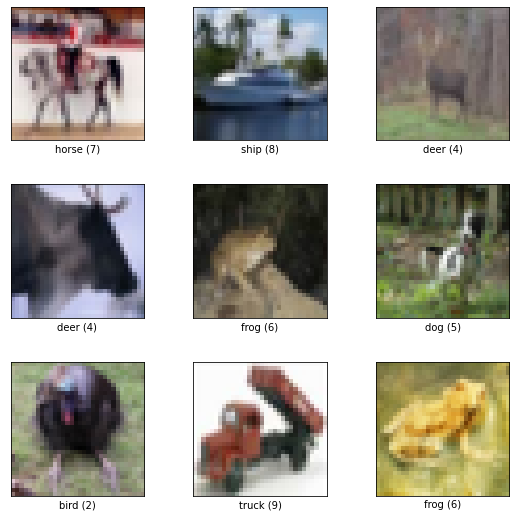

In [100]:
img = tfds.show_examples(ds_train, ds_info)

In [101]:
for image, label in ds_train.take(1):
    print(image.shape, label)

(32, 32, 3) tf.Tensor(7, shape=(), dtype=int64)


In [102]:
for image, label in ds_test.take(1):
    print(image.shape, label)

(32, 32, 3) tf.Tensor(7, shape=(), dtype=int64)


,image,label
0,,7 (horse)
1,,8 (ship)
2,,4 (deer)
3,,4 (deer)

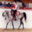
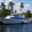
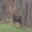
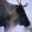

In [103]:
tfds.as_dataframe(ds_train.take(4), ds_info)

In [104]:
ds_info

tfds.core.DatasetInfo(
    name='cifar10',
    version=3.0.2,
    description='The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.',
    homepage='https://www.cs.toronto.edu/~kriz/cifar.html',
    features=FeaturesDict({
        'id': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(32, 32, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=60000,
    splits={
        'test': 10000,
        'train': 50000,
    },
    supervised_keys=('image', 'label'),
    citation="""@TECHREPORT{Krizhevsky09learningmultiple,
        author = {Alex Krizhevsky},
        title = {Learning multiple layers of features from tiny images},
        institution = {},
        year = {2009}
    }""",
    redistribution_info=,
)

In [105]:
ds_info.features

FeaturesDict({
    'id': Text(shape=(), dtype=tf.string),
    'image': Image(shape=(32, 32, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})

In [106]:
ds_info.features['label'].num_classes

10

In [107]:
ds_info.features['label'].names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [108]:
ds_info.features.shape

{'id': (), 'image': (32, 32, 3), 'label': ()}

In [109]:
ds_info.features['image'].shape

(32, 32, 3)

In [110]:
ds_info.features.dtype

{'id': tf.string, 'image': tf.uint8, 'label': tf.int64}

In [121]:
ds_info.splits['train'].num_examples

50000

In [111]:
# TFDS provide images of type tf.uint8
# while the model expects tf.float32
# so need to normalize images

def normalize_img(image, label):
    return tf.cast(image, tf.float32)/255.0, label

In [112]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
BATCH_SIZE = 128

In [113]:
ds_train = ds_train.map(normalize_img, num_parallel_calls=AUTOTUNE)     # map to normalize images
ds_train = ds_train.cache()                                             # cache dataset for memory fit
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)       # shuffle data, can be defaulted to 10000 or etc
ds_train = ds_train.batch(BATCH_SIZE)                                   # use it to get unique batches at each epoch

In [114]:
ds_test = ds_test.map(normalize_img, num_parallel_calls=AUTOTUNE)
ds_test = ds_test.batch(BATCH_SIZE)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(AUTOTUNE)

In [115]:
ds_train

<BatchDataset shapes: ((None, 32, 32, 3), (None,)), types: (tf.float32, tf.int64)>

In [116]:
ds_test

<PrefetchDataset shapes: ((None, 32, 32, 3), (None,)), types: (tf.float32, tf.int64)>

In [119]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10)
])

model.compile(
    optimizer = tf.keras.optimizers.Adam(0.001),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy'],
)

model.fit(
    ds_train,
    epochs = 5,
    validation_data=ds_test,
)

Epoch 1/5
391/391 [==============================] - 16s 17ms/step - loss: 1.9373 - accuracy: 0.3065 - val_loss: 1.8007 - val_accuracy: 0.3528
Epoch 2/5
391/391 [==============================] - 4s 11ms/step - loss: 1.7626 - accuracy: 0.3754 - val_loss: 1.7269 - val_accuracy: 0.3861
Epoch 3/5
391/391 [==============================] - 5s 12ms/step - loss: 1.7010 - accuracy: 0.3990 - val_loss: 1.7046 - val_accuracy: 0.3902
Epoch 4/5
391/391 [==============================] - 5s 11ms/step - loss: 1.6635 - accuracy: 0.4145 - val_loss: 1.6725 - val_accuracy: 0.4044
Epoch 5/5
391/391 [==============================] - 4s 11ms/step - loss: 1.6373 - accuracy: 0.4212 - val_loss: 1.6517 - val_accuracy: 0.4089


In [120]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               393344    
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________


## Sentiment140

https://www.tensorflow.org/datasets/catalog/sentiment140

In [124]:
(ds_train, ds_test), ds_info = tfds.load('sentiment140', split=['train','test'], shuffle_files=True, as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/sentiment140/1.0.0.incomplete0DUL0J/sentiment140-train.tfrecord


  0%|          | 0/1600000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/sentiment140/1.0.0.incomplete0DUL0J/sentiment140-test.tfrecord


  0%|          | 0/498 [00:00<?, ? examples/s]

Dataset sentiment140 downloaded and prepared to /root/tensorflow_datasets/sentiment140/1.0.0. Subsequent calls will reuse this data.


In [125]:
ds_train

<_OptionsDataset shapes: ((), ()), types: (tf.string, tf.int32)>

In [126]:
ds_test

<_OptionsDataset shapes: ((), ()), types: (tf.string, tf.int32)>

In [127]:
ds_info

tfds.core.DatasetInfo(
    name='sentiment140',
    version=1.0.0,
    description='Sentiment140 allows you to discover the sentiment of a brand, product, or topic on Twitter.

The data is a CSV with emoticons removed. Data file format has 6 fields:

0. the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)
1. the id of the tweet (2087)
2. the date of the tweet (Sat May 16 23:58:44 UTC 2009)
3. the query (lyx). If there is no query, then this value is NO_QUERY.
4. the user that tweeted (robotickilldozr)
5. the text of the tweet (Lyx is cool)

For more information, refer to the paper
Twitter Sentiment Classification with Distant Supervision at
https://cs.stanford.edu/people/alecmgo/papers/TwitterDistantSupervision09.pdf',
    homepage='http://help.sentiment140.com/home',
    features=FeaturesDict({
        'date': Text(shape=(), dtype=tf.string),
        'polarity': tf.int32,
        'query': Text(shape=(), dtype=tf.string),
        'text': Text(shape=(), dtype=tf.string),


In [128]:
ds_info.features

FeaturesDict({
    'date': Text(shape=(), dtype=tf.string),
    'polarity': tf.int32,
    'query': Text(shape=(), dtype=tf.string),
    'text': Text(shape=(), dtype=tf.string),
    'user': Text(shape=(), dtype=tf.string),
})

In [136]:
ds_info.features.dtype

{'date': tf.string,
 'polarity': tf.int32,
 'query': tf.string,
 'text': tf.string,
 'user': tf.string}

In [137]:
ds_info.splits['train'].num_examples

1600000

In [133]:
for text, label in ds_train.take(5):
    print(text)
    print(label)

tf.Tensor(b"i'm 10x cooler than all of you! ", shape=(), dtype=string)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(b'O.kk? Thats weird I cant stop following people on twitter... I have tons of people to unfollow ', shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(b'what a beautiful day not to got to my first class ', shape=(), dtype=string)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(b".@HildyGottlieb &amp; I was just saying to Maha'al yesterday, everything we ever needed to know was in Beatles' lyrics - you prove my point! ", shape=(), dtype=string)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(b'kinda sad and confused  why do guys do this?', shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int32)


In [134]:
for text, label in ds_train.take(5):
    print(text.numpy())
    print(label.numpy())

b'ouch! i just burned my finger so bad '
0
b"@MCeeYOSHi that's my movie ! "
4
b'im so happy i found some one who wants to move slow mentally, but not physically. as i do.  fine uhh leee'
4
b'My sister is taking over my room! '
0
b'I really suck at pinball '
0


In [135]:
for text, label in ds_train.take(5):
    print(text.numpy().decode('utf8'))
    print(label.numpy())

The movie our teacher assigned to us this week makes me fall asleep 
0
@amrosario Yup they sure are. Try sitting on you knees in fromt of one to take a picture. I did! 
4
Still hoping to get a reply to a note I left for someone 
0
@mattbeetar thank you thank you! I shall try my best to make it a good one! 
4
http://twitpic.com/6ioht i want him!!!!!!! 
0
